In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [4]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')


In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,1,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,3,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,3,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,3,1


In [7]:
features= np.array(data.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [8]:
labels= data.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [9]:
data.loc[data["trestbps"] < 100, "trestbps"] = 100
data.loc[data["trestbps"] > 170, "trestbps"] = 170

data.loc[data["chol"] < 100, "chol"] = 100
data.loc[data["chol"] > 320, "chol"] = 320

data.loc[data["thalach"] < 60, "thalachthalach"] = 60
data.loc[data["thalach"] > 202, "thalachthalach"] = 202

data.loc[data["oldpeak"] < 0, "oldpeak"] = 0
data.loc[data["oldpeak"] > 2.5, "oldpeak"] = 2.5

In [10]:
data = pd.get_dummies(data, columns=["sex", "cp", "restecg", "exang", "slope"], drop_first=True)

In [11]:
x = data.drop("target", axis=1)
y = data["target"]
#30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [12]:
model = XGBClassifier().fit(x_train, y_train)
train_acc = model.score(x_train, y_train)
    
y_pred = model.predict(x)


In [13]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [14]:
x1=df.drop(["target"],axis=1)
x1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,1
299,43,0,4,132,341,1,2,136,1,3.0,2,0,3
300,65,1,4,135,254,0,2,127,0,2.8,2,1,3
301,48,1,4,130,256,1,2,150,1,0.0,1,2,3


In [15]:
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values
x

C:\Users\JYOTIKA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.25,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0
1,0.791667,1.0,1.00,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.5
2,0.791667,1.0,1.00,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0
3,0.166667,1.0,0.75,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.5
4,0.250000,0.0,0.50,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.479167,1.0,0.25,0.226415,0.136986,0.0,1.0,0.908397,0.0,0.000000,0.5,0.000000,0.0
299,0.291667,0.0,1.00,0.358491,0.490868,1.0,1.0,0.496183,1.0,0.483871,0.5,0.000000,1.0
300,0.750000,1.0,1.00,0.386792,0.292237,0.0,1.0,0.427481,0.0,0.451613,0.5,0.333333,1.0
301,0.395833,1.0,1.00,0.339623,0.296804,1.0,1.0,0.603053,1.0,0.000000,0.0,0.666667,1.0


In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y_pred,test_size=0.3, random_state=0)

In [17]:
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [18]:
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [19]:
#Forward & Backward Propogation

def forward_backwardpropogation(w,b,xtrain,y_train):
    #forward P.
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    #backward p.
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [20]:
#Uptading parameters

def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    #updating/learning parameters is number of iteration times
    for i in range(number_of_iteration):
        #makeforwardandbacwardprop.andfindcostandgradi
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        #updatingtime
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
    #weupdate(learn) parameters weight & bias
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [21]:
#%% Prediciton Method
    
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    #if z > 0.5 predcition = 1 y_head=1
    #if z <= 0.5 prediciton = 0 y_head=0
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [22]:
# Logistic Reg.

def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    #initializing
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    #forward & backward prop.
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)

    #print train/test errors
    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))



Cost after iteration 0: 0.701885
Cost after iteration 10: 0.519017
Cost after iteration 20: 0.463275
Cost after iteration 30: 0.430627
Cost after iteration 40: 0.409227


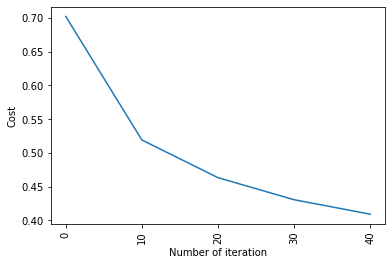

Test Accuracy:89.01098901098901 %


In [23]:
#Application1
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =50 )

Cost after iteration 0: 0.701885
Cost after iteration 10: 0.519017
Cost after iteration 20: 0.463275
Cost after iteration 30: 0.430627
Cost after iteration 40: 0.409227
Cost after iteration 50: 0.394105
Cost after iteration 60: 0.382859
Cost after iteration 70: 0.374182
Cost after iteration 80: 0.367300
Cost after iteration 90: 0.361719


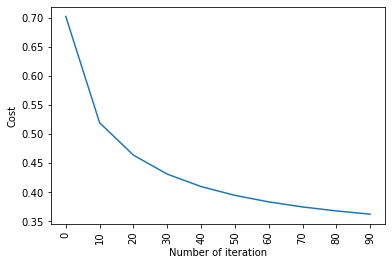

Test Accuracy:91.20879120879121 %


In [24]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

Cost after iteration 0: 0.701885
Cost after iteration 10: 0.519017
Cost after iteration 20: 0.463275
Cost after iteration 30: 0.430627
Cost after iteration 40: 0.409227
Cost after iteration 50: 0.394105
Cost after iteration 60: 0.382859
Cost after iteration 70: 0.374182
Cost after iteration 80: 0.367300
Cost after iteration 90: 0.361719
Cost after iteration 100: 0.357111
Cost after iteration 110: 0.353250
Cost after iteration 120: 0.349973
Cost after iteration 130: 0.347160
Cost after iteration 140: 0.344723
Cost after iteration 150: 0.342592
Cost after iteration 160: 0.340716
Cost after iteration 170: 0.339051
Cost after iteration 180: 0.337566
Cost after iteration 190: 0.336232
Cost after iteration 200: 0.335028
Cost after iteration 210: 0.333937
Cost after iteration 220: 0.332942
Cost after iteration 230: 0.332033
Cost after iteration 240: 0.331197
Cost after iteration 250: 0.330427
Cost after iteration 260: 0.329715
Cost after iteration 270: 0.329053
Cost after iteration 280: 0.328

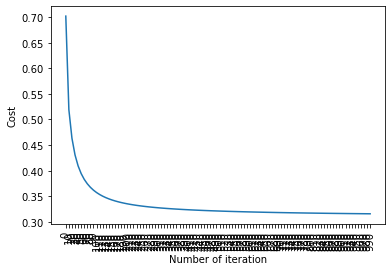

Test Accuracy:92.3076923076923 %


In [25]:
#Application3
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =1000)

Cost after iteration 0: 0.701885
Cost after iteration 10: 0.554831
Cost after iteration 20: 0.425669
Cost after iteration 30: 0.361966
Cost after iteration 40: 0.347258
Cost after iteration 50: 0.340909
Cost after iteration 60: 0.336507
Cost after iteration 70: 0.333244
Cost after iteration 80: 0.330731
Cost after iteration 90: 0.328734
Cost after iteration 100: 0.327105
Cost after iteration 110: 0.325747
Cost after iteration 120: 0.324594
Cost after iteration 130: 0.323600
Cost after iteration 140: 0.322732
Cost after iteration 150: 0.321966
Cost after iteration 160: 0.321283
Cost after iteration 170: 0.320671
Cost after iteration 180: 0.320117
Cost after iteration 190: 0.319615
Cost after iteration 200: 0.319156
Cost after iteration 210: 0.318735
Cost after iteration 220: 0.318348
Cost after iteration 230: 0.317992
Cost after iteration 240: 0.317662
Cost after iteration 250: 0.317355
Cost after iteration 260: 0.317071
Cost after iteration 270: 0.316806
Cost after iteration 280: 0.316

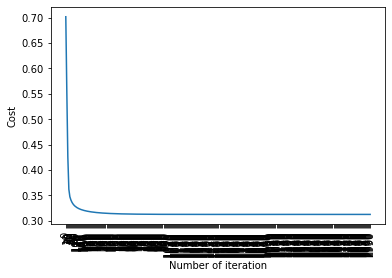

Test Accuracy:92.3076923076923 %


In [26]:
#Application4
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=3,number_of_iteration =3000)

In [27]:
xtrain.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,0.833333,1.0,0.75,0.433962,0.292237,0.0,1.0,0.572519,0.0,0.322581,0.5,1.000000,1.0
106,0.604167,1.0,1.00,0.292453,0.397260,0.0,1.0,0.763359,0.0,0.000000,0.0,0.666667,1.0
284,0.479167,1.0,0.50,0.377358,0.171233,0.0,0.0,0.664122,0.0,0.129032,0.0,0.333333,0.5
44,0.750000,1.0,1.00,0.150943,0.278539,0.0,1.0,0.664122,0.0,0.096774,0.0,0.666667,0.0
139,0.458333,1.0,1.00,0.433962,0.392694,0.0,0.0,0.389313,1.0,0.677419,0.5,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.583333,1.0,0.00,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.0,0.333333,0.5
192,0.791667,1.0,1.00,0.245283,0.253425,0.0,0.0,0.000000,0.0,0.161290,0.5,0.000000,0.5
117,0.333333,0.0,0.50,0.169811,0.077626,0.0,0.0,0.511450,0.0,0.000000,0.5,0.000000,0.5
47,0.645833,1.0,1.00,0.292453,0.301370,0.0,1.0,0.534351,1.0,0.451613,0.5,0.333333,1.0


In [28]:
#LR with sklearn
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T)))


Test Accuracy 0.8901098901098901


In [29]:
yprediciton= LR.predict(x)

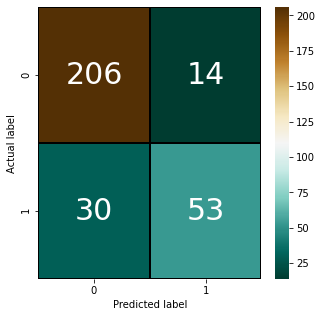

In [30]:
yprediciton= LR.predict(x)
ytrue = ytest.T

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=1,cmap='BrBG_r',linecolor="black",fmt=".0f",ax=ax,annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.8547854785478548
Sensitivity for the hybrid model: 0.8728813559322034
Specificity for the hybrid model: 0.7910447761194029
Precision for the hybrid model: 0.9363636363636364
